<a href="https://colab.research.google.com/github/juhumkwon/YOLO/blob/main/yolo(%EC%A0%84%EC%9D%B4_%ED%95%99%EC%8A%B5%EB%90%9C_COCO_%EA%B0%80%EC%A4%91%EC%B9%98_%EC%82%AC%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. 필수 라이브러리 설치

!pip install ultralytics


0: 640x416 1 bird, 217.9ms
Speed: 4.6ms preprocess, 217.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)
Detected objects:
x1, y1, x2, y2, confidence, cls = 54 185 378 547 tensor(0.9174) 14


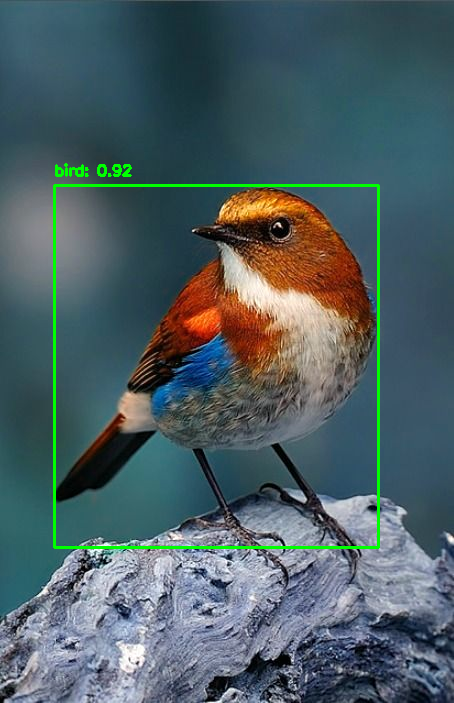

In [ ]:
# 2. 코드: 전이 학습된 YOLO 모델로 추론
# 아래는 YOLOv8 모델을 사용하여 추론을 수행하는 코드입니다.

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os # import the os module
from google.colab.patches import cv2_imshow # import cv2_imshow from google.colab.patches


# 모델 불러오기 (전이 학습된 COCO 가중치 사용)
model = YOLO("yolov8n.pt")  # 'n'은 nano 모델로, 경량화된 버전 (속도 우선)

# 이미지 불러오기
def load_image(image_path):
    # Check if the image file exists
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        raise ValueError(f"Failed to load image: {image_path}")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 포맷을 사용하므로 RGB로 변환
    return image

# 추론 및 시각화
def predict_and_visualize(model, image_path):
    # 이미지 불러오기
    image = load_image(image_path)

    # 모델 추론
    results = model(image)  # YOLO 모델로 추론

    for result in results:
        print("Detected objects:")
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # 바운딩 박스 좌표
            confidence = box.conf[0]  # 객체 확률
            cls = int(box.cls[0])  # 클래스 ID
            print("x1, y1, x2, y2, confidence, cls =", x1, y1, x2, y2, confidence, cls)
            # 클래스 이름 및 바운딩 박스 표시
            label = f"{model.names[cls]}: {confidence:.2f}"
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2_imshow(image)
#    cv2.waitKey(0)
#    cv2.destroyAllWindows()

"""
    plt.figure(figsize=(12, 12))
    plt.imshow(image)
    plt.axis("off")
    plt.title("Predicted Objects")
    plt.show()
"""

# 실행
if __name__ == "__main__":
    image_path = "/content/bird.jpg"  # 추론할 이미지 경로
    predict_and_visualize(model, image_path)
